In [27]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy import optimize
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import ScalarFormatter
from adjustText import adjust_text

In [28]:
savedir = "/Users/thepoetoftwilight/Documents/SOFIA_FIFI_Cycle-8/Data/Processed/"
df = pd.read_csv(savedir + "emission_line_database.csv")

In [29]:
df.dtypes

Galaxy         object
Unnamed: 1     object
Unnamed: 2     object
Redshift      float64
Sp             object
Z (Zsun)      float64
eZ            float64
PlanID         object
PI             object
SOFIA          object
o3_52          object
err_52         object
n3_57          object
err_57         object
o3_88         float64
err_88        float64
dtype: object

In [30]:
df["o3_52"] = pd.to_numeric(df["o3_52"] , errors = "coerce")
df["err_52"] = pd.to_numeric(df["err_52"] , errors = "coerce")
df["n3_57"] = pd.to_numeric(df["n3_57"] , errors = "coerce")
df["err_57"] = pd.to_numeric(df["err_57"] , errors = "coerce")

In [31]:
df.dtypes

Galaxy         object
Unnamed: 1     object
Unnamed: 2     object
Redshift      float64
Sp             object
Z (Zsun)      float64
eZ            float64
PlanID         object
PI             object
SOFIA          object
o3_52         float64
err_52        float64
n3_57         float64
err_57        float64
o3_88         float64
err_88        float64
dtype: object

In [32]:
df

,Galaxy,Unnamed: 1,Unnamed: 2,Redshift,Sp,Z (Zsun),eZ,PlanID,PI,SOFIA,o3_52,err_52,n3_57,err_57,o3_88,err_88
0,NGC5506,14h13m14.8757s,-03d12m27.6984s,0.006181,S1h,0.64,0.17,NaN,NaN,NaN,101.71,20.12,30.79,2.14,102.26,3.31
1,3C405,19h59m28.3490s,+40d44m02.0616s,0.056075,S1.9,0.67,0.03,NaN,NaN,NaN,78.58,15.69,9.49,3.80,28.04,1.30
2,NGC253,00h47m33.0727s,-25d17m18.9960s,0.000811,HII,0.72,0.30,NaN,NaN,NaN,389.21,183.61,599.54,178.33,625.21,53.54
3,NGC4151,12h10m32.5812s,+39d24m21.0564s,0.003319,S1.5,0.82,0.22,NaN,NaN,NaN,37.56,9.56,21.73,2.00,48.40,2.87
4,Mrk463E,13h56m02.8855s,+18d22m18.1884s,0.050000,S1h,0.85,0.22,NaN,NaN,NaN,45.95,7.92,9.61,2.11,39.68,4.13
5,NGC1068,02h42m40.7071s,-00d00m48.0204s,0.003793,S1h,0.89,0.04,NaN,NaN,NaN,369.41,34.74,443.65,41.95,634.33,19.71
6,Mrk3,06h15m36.4104s,+71d02m14.9388s,0.013509,S1h,1.15,0.00,NaN,NaN,NaN,114.84,46.53,19.64,3.93,58.49,2.94
7,NGC6240,16h52m58.8862s,+02d24m03.6288s,0.024480,LIN,1.45,0.00,NaN,NaN,NaN,46.57,26.39,12.50,5.86,33.10,5.57
8,IC4329A,13h49m19.2478s,-30d18m34.0812s,0.016054,S1.2,1.58,0.40,NaN,NaN,NaN,25.94,5.55,9.45,2.92,31.95,1.41
9,NGC7582,23h18m23.6107s,-42d22m13.6020s,0.005254,S1h,2.95,0.07,NaN,NaN,NaN,139.82,8.13,65.58,10.23,201.88,5.29


In [33]:
Z = df["Z (Zsun)"]
o3_52 = df["o3_52"]
n3_57 = df["n3_57"]
o3_88 = df["o3_88"]
names = df["Galaxy"]

In [34]:
logZ_Z_0 = np.log10(Z)
diagnostic_1 = np.log10((2.2*o3_88 + o3_52)/n3_57)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

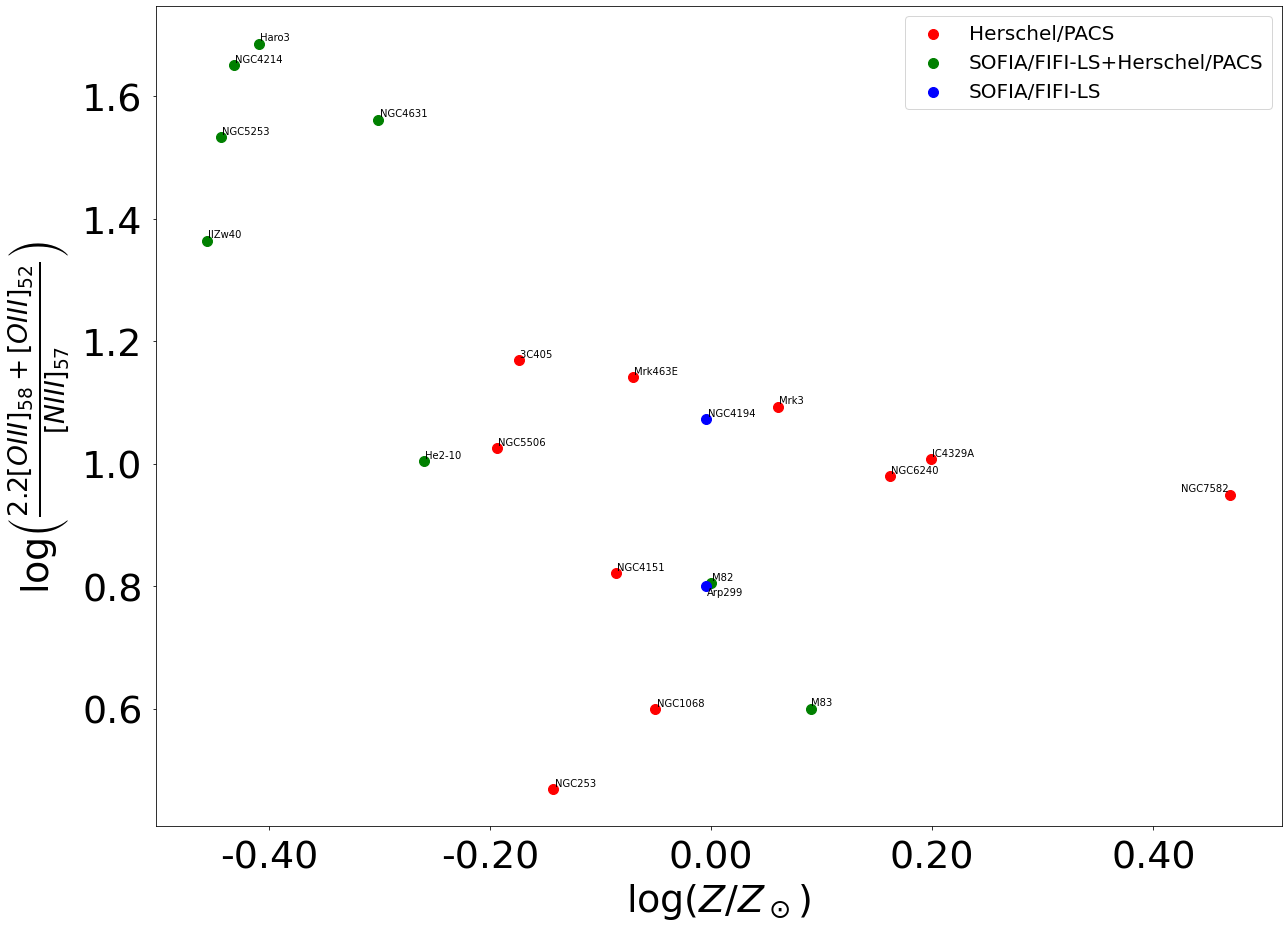

In [35]:
fig, ax = plt.subplots(figsize = (18, 13))

ax.scatter(logZ_Z_0[0:11], diagnostic_1[0:11], s = 100, color = 'red', label = "Herschel/PACS")
ax.scatter(logZ_Z_0[11:28], diagnostic_1[11:28], s = 100, color = 'green', label = "SOFIA/FIFI-LS+Herschel/PACS")
ax.scatter(logZ_Z_0[27:], diagnostic_1[27:], s = 100, color = 'blue', label = "SOFIA/FIFI-LS")

ax.set_xlabel(r'$\log(Z/Z_\odot)$', fontsize = 38, labelpad = 5)
ax.set_ylabel(r'$\log \left( \frac{2.2[OIII]_{58} + [OIII]_{52}}{[NIII]_{57}} \right)$', fontsize = 38, labelpad = 10)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.ticklabel_format(axis='y', style='sci', scilimits = (0, 0))
ax.tick_params(labelsize = 38, pad = 10)
ax.yaxis.offsetText.set_fontsize(36)

texts = []
for i, txt in enumerate(names):
    texts.append(ax.text(logZ_Z_0[i], diagnostic_1[i], txt))
adjust_text(texts)

ax.legend(prop={'size': 20}, loc = 'upper right')
plt.tight_layout()
plt.savefig(savedir + "diagnostic_1.png")

In [36]:
diagnostic_2 = np.log10(o3_52/o3_88)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

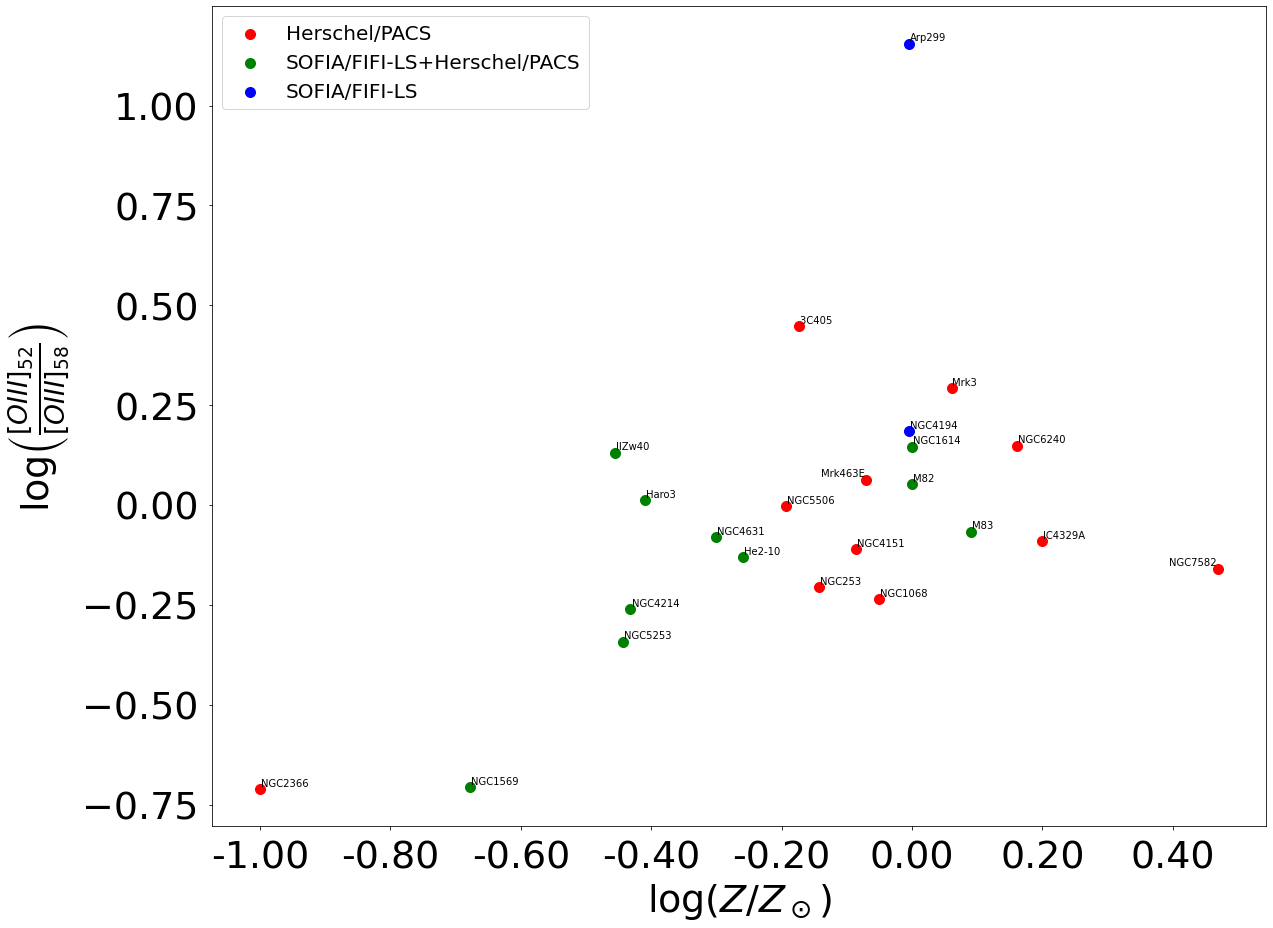

In [37]:
fig, ax = plt.subplots(figsize = (18, 13))

ax.scatter(logZ_Z_0[0:11], diagnostic_2[0:11], s = 100, color = 'red', label = "Herschel/PACS")
ax.scatter(logZ_Z_0[11:28], diagnostic_2[11:28], s = 100, color = 'green', label = "SOFIA/FIFI-LS+Herschel/PACS")
ax.scatter(logZ_Z_0[27:], diagnostic_2[27:], s = 100, color = 'blue', label = "SOFIA/FIFI-LS")

ax.set_xlabel(r'$\log(Z/Z_\odot)$', fontsize = 38, labelpad = 5)
ax.set_ylabel(r'$\log \left( \frac{[OIII]_{52}}{[OIII]_{58}} \right)$', fontsize = 38, labelpad = 10)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.ticklabel_format(axis='y', style='sci', scilimits = (0, 0))
ax.tick_params(labelsize = 38, pad = 10)
ax.yaxis.offsetText.set_fontsize(36)

texts = []
for i, txt in enumerate(names):
    texts.append(ax.text(logZ_Z_0[i], diagnostic_2[i], txt))
adjust_text(texts)
    
ax.legend(prop={'size': 20}, loc = 'upper left')

plt.tight_layout()
plt.savefig(savedir + "diagnostic_2.png")

In [38]:
diagnostic_3 = np.log10(n3_57/o3_88)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

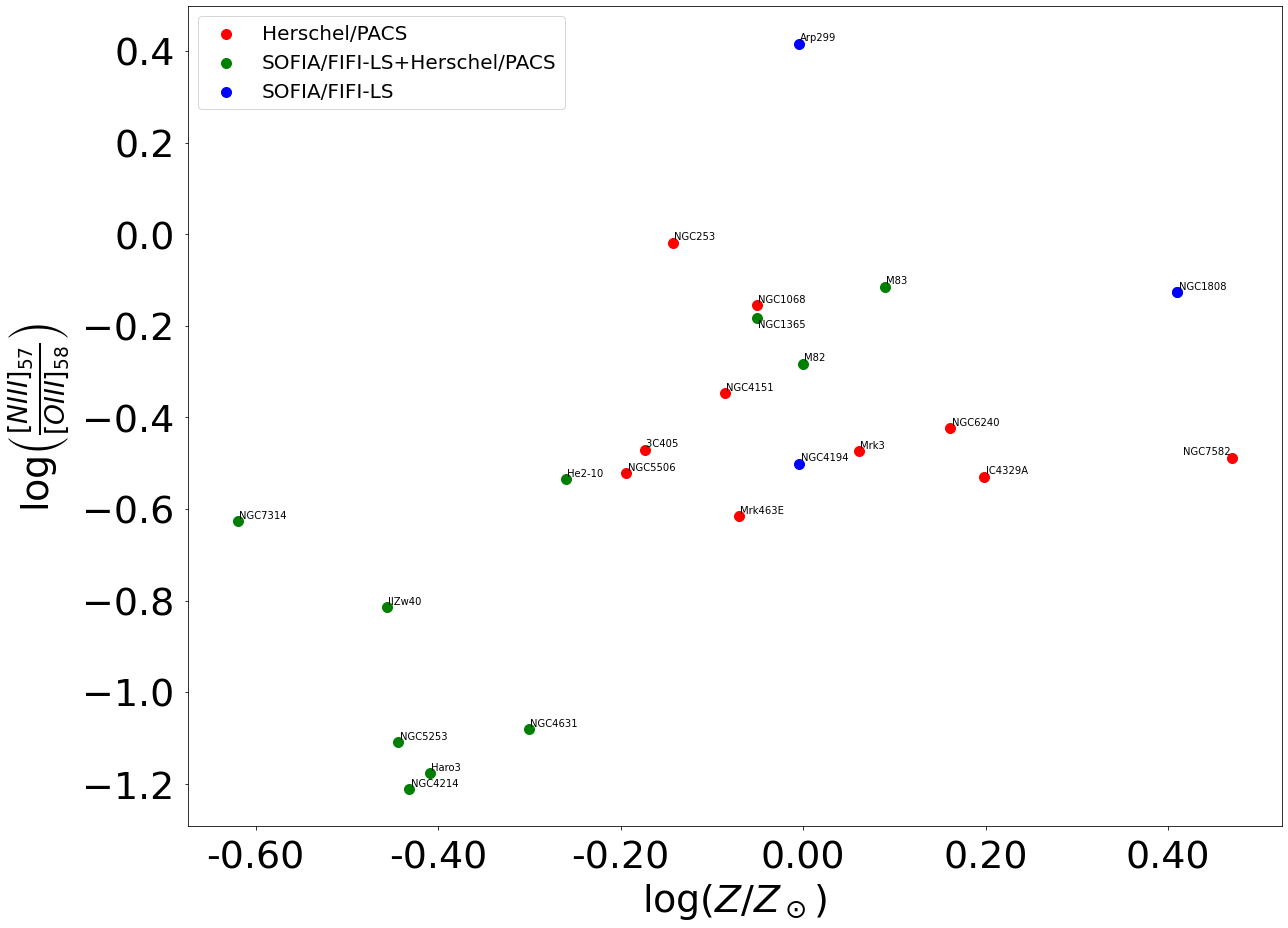

In [39]:
fig, ax = plt.subplots(figsize = (18, 13))

ax.scatter(logZ_Z_0[0:11], diagnostic_3[0:11], s = 100, color = 'red', label = "Herschel/PACS")
ax.scatter(logZ_Z_0[11:28], diagnostic_3[11:28], s = 100, color = 'green', label = "SOFIA/FIFI-LS+Herschel/PACS")
ax.scatter(logZ_Z_0[27:], diagnostic_3[27:], s = 100, color = 'blue', label = "SOFIA/FIFI-LS")

ax.set_xlabel(r'$\log(Z/Z_\odot)$', fontsize = 38, labelpad = 5)
ax.set_ylabel(r'$\log \left( \frac{[NIII]_{57}}{[OIII]_{58}} \right)$', fontsize = 38, labelpad = 10)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.ticklabel_format(axis='y', style='sci', scilimits = (0, 0))
ax.tick_params(labelsize = 38, pad = 10)
ax.yaxis.offsetText.set_fontsize(36)

texts = []
for i, txt in enumerate(names):
    texts.append(ax.text(logZ_Z_0[i], diagnostic_3[i], txt))
adjust_text(texts)
    
ax.legend(prop={'size': 20}, loc = 'upper left')

plt.tight_layout()
plt.savefig(savedir + "diagnostic_3.png")

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

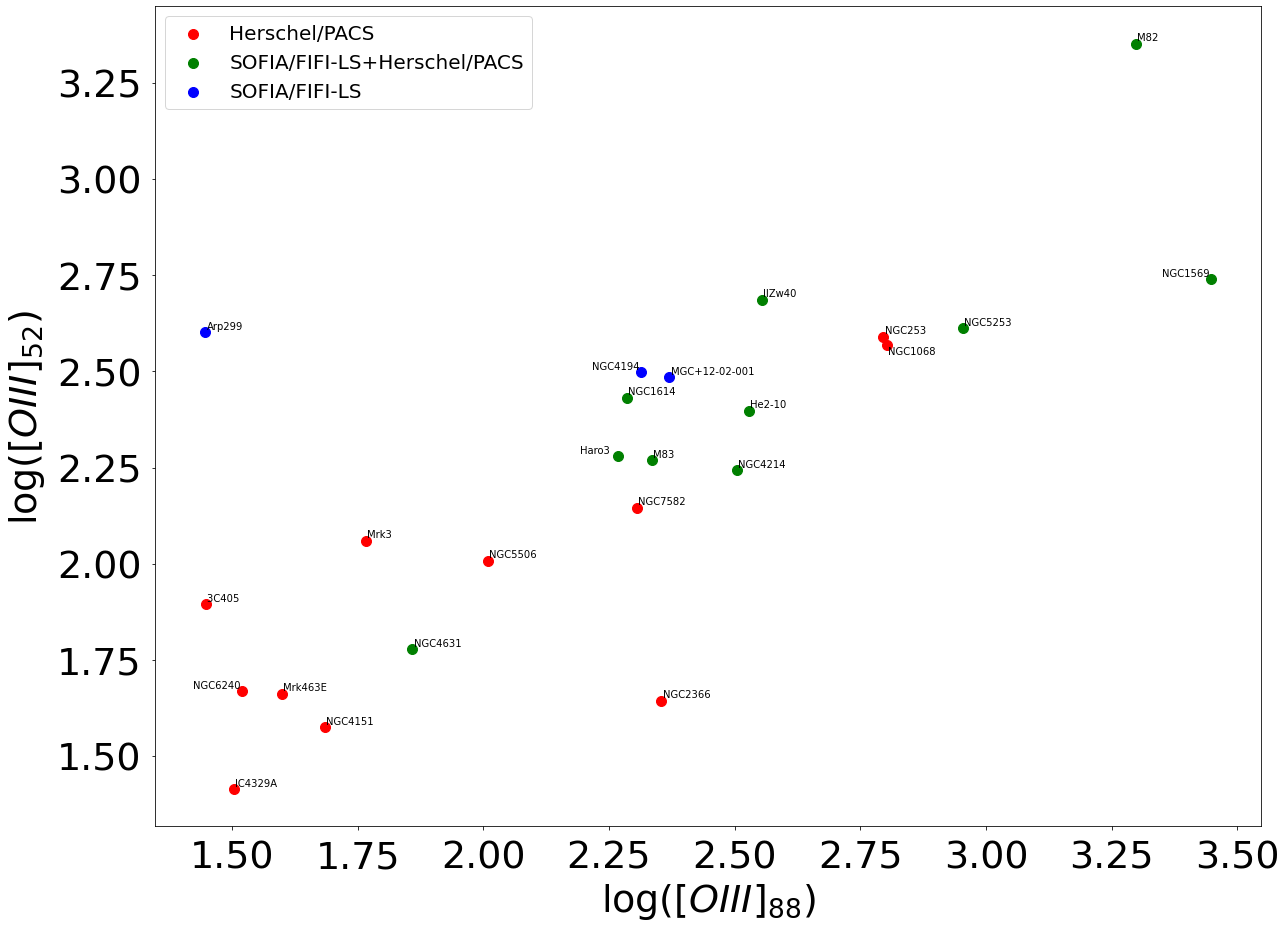

In [40]:
fig, ax = plt.subplots(figsize = (18, 13))

ax.scatter(np.log10(o3_88[0:11]), np.log10(o3_52[0:11]), s = 100, color = 'red', label = "Herschel/PACS")
ax.scatter(np.log10(o3_88[11:28]), np.log10(o3_52[11:28]), s = 100, color = 'green', label = "SOFIA/FIFI-LS+Herschel/PACS")
ax.scatter(np.log10(o3_88[27:]), np.log10(o3_52[27:]), s = 100, color = 'blue', label = "SOFIA/FIFI-LS")

ax.set_xlabel(r'$\log([OIII]_{88})$', fontsize = 38, labelpad = 5)
ax.set_ylabel(r'$\log([OIII]_{52})$', fontsize = 38, labelpad = 10)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.ticklabel_format(axis='y', style='sci', scilimits = (0, 0))
ax.tick_params(labelsize = 38, pad = 10)
ax.yaxis.offsetText.set_fontsize(36)

texts = []
for i, txt in enumerate(names):
    texts.append(ax.text(np.log10(o3_88[i]), np.log10(o3_52[i]), txt))
adjust_text(texts)
    
ax.legend(prop={'size': 20}, loc = 'upper left')

plt.tight_layout()
plt.savefig(savedir + "relation_1.png")

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

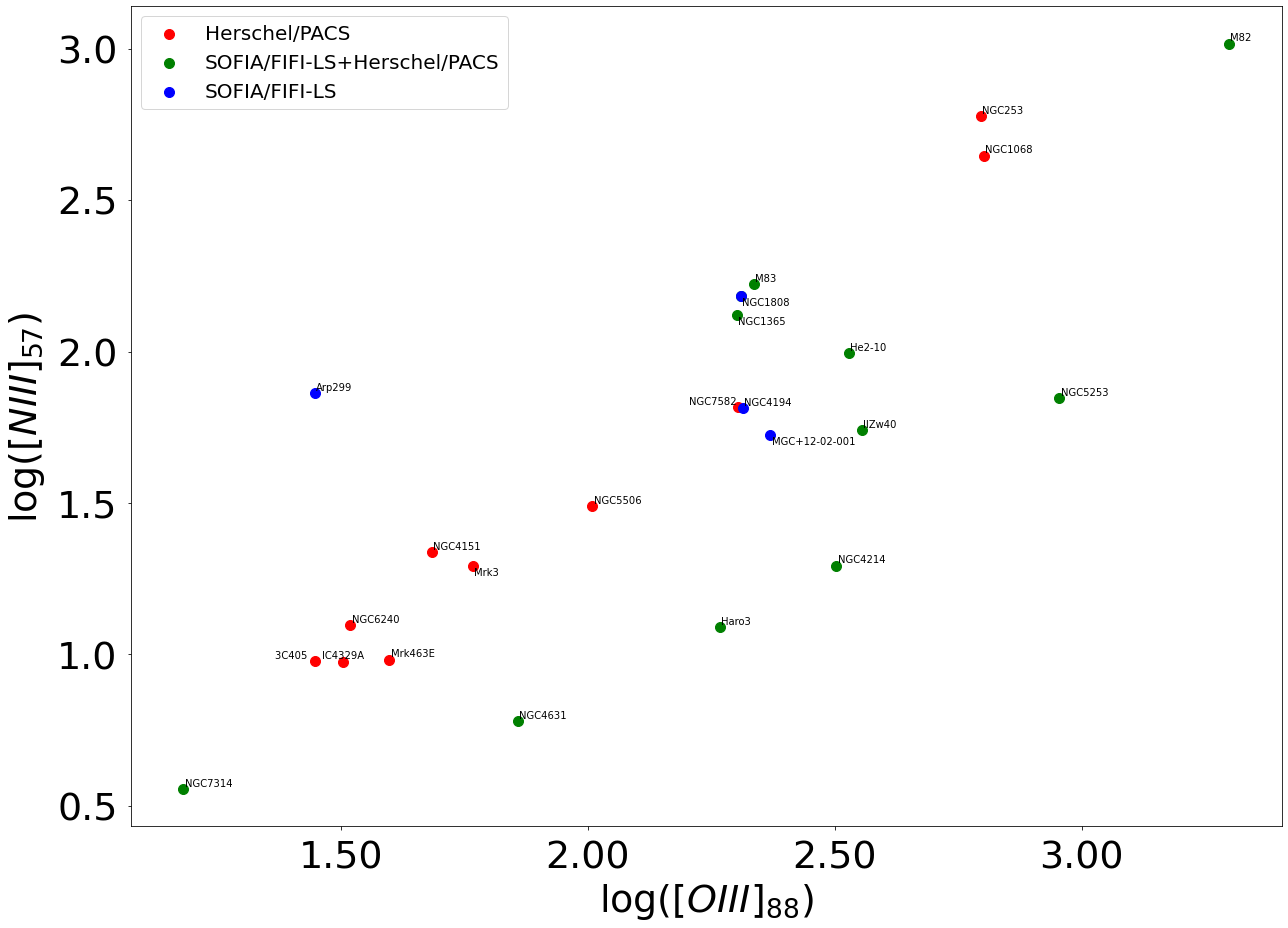

In [41]:
fig, ax = plt.subplots(figsize = (18, 13))

ax.scatter(np.log10(o3_88[0:11]), np.log10(n3_57[0:11]), s = 100, color = 'red', label = "Herschel/PACS")
ax.scatter(np.log10(o3_88[11:28]), np.log10(n3_57[11:28]), s = 100, color = 'green', label = "SOFIA/FIFI-LS+Herschel/PACS")
ax.scatter(np.log10(o3_88[27:]), np.log10(n3_57[27:]), s = 100, color = 'blue', label = "SOFIA/FIFI-LS")

ax.set_xlabel(r'$\log([OIII]_{88})$', fontsize = 38, labelpad = 5)
ax.set_ylabel(r'$\log([NIII]_{57})$', fontsize = 38, labelpad = 10)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.ticklabel_format(axis='y', style='sci', scilimits = (0, 0))
ax.tick_params(labelsize = 38, pad = 10)
ax.yaxis.offsetText.set_fontsize(36)

texts = []
for i, txt in enumerate(names):
    texts.append(ax.text(np.log10(o3_88[i]), np.log10(n3_57[i]), txt))
adjust_text(texts)
    
ax.legend(prop={'size': 20}, loc = 'upper left')

plt.tight_layout()
plt.savefig(savedir + "relation_2.png")